In [1]:
import numpy as np
import pandas as pd
import pylab as pl

In [2]:
data = pd.read_csv('adult.data.csv')

In [3]:
# Task #1
# Here we will calculate distribution by sex
# Males: 21782
# Females: 10766
print data['sex'].value_counts()

Male      21782
Female    10766
dtype: int64


In [4]:
# Task #2
# Here we will calculate mean age of males
print data[data['sex'] == 'Male']['age'].mean()

39.4323753558


In [5]:
# Task #3
# Here we'll calculate proportion of US citizens
us_citizens_count = len(data[data['native-country'] == 'United-States']) * 1.0
total_citizens_count = len(data)
us_citizens_proportion = us_citizens_count / total_citizens_count
print 'There are {:.2%} of US citizens'.format(us_citizens_proportion)

There are 89.59% of US citizens


In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

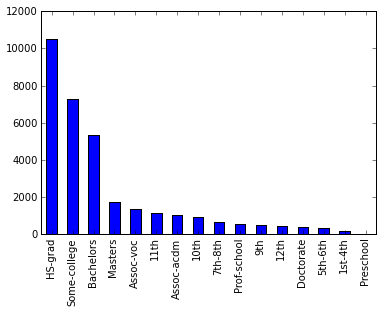

In [7]:
# Task 4
# Distribution of people's education
data['education'].value_counts().plot(kind='bar')

In [8]:
# Task 5
# Mean and standart deviation of the final weight for divorced people
# Mean: 185796.07204
# Standart deviation: 105657.734035
divorced_people = data[data['marital-status'] == 'Divorced']
print 'Mean: %s' % divorced_people['fnlwgt'].mean()
print 'Standart deviation: %s' % divorced_people['fnlwgt'].var() ** 0.5

Mean: 185796.07204
Standart deviation: 105657.734035


In [9]:
# Task 6
# Check if people who receive over 50k are mostly highly educated

# It is obvious that number of people with salary >50K is mostly the same
# as number of rich people withot it
# Answer is false

rich_people = data[data['salary'] == '>50K'] 
total_count = len(rich_people) * 1.0
with_edu = len(rich_people[rich_people['education-num'] >= 12])
with_no_edu = len(rich_people[rich_people['education-num'] < 12])
print 'Num of people with high education: %s, without: %s\n' % (with_edu, with_no_edu)
if with_edu / total_count - with_no_edu / total_count <= 0.1:
    print 'It is not true that people with salary >50K mostly have high education'
else:
    print 'It is true that people with salary >50K mostly have high education'

Num of people with high education: 4171, without: 3665

It is not true that people with salary >50K mostly have high education


In [10]:
# Task 7
# Max age of males and females in different races
print 'Max age of males and females in different races: \n'
print data.groupby(['sex', 'race'])['age'].max()

Max age of males and females in different races: 

sex     race              
Female  Amer-Indian-Eskimo    80
        Asian-Pac-Islander    75
        Black                 90
        Other                 74
        White                 90
Male    Amer-Indian-Eskimo    82
        Asian-Pac-Islander    90
        Black                 90
        Other                 77
        White                 90
Name: age, dtype: int64


In [11]:
# Task 8
farmers_fishers = data[data['occupation'] == 'Farming-fishing']
print 'Native countries of farmers and fishers: \n'
print farmers_fishers.groupby('native-country').size()

Native countries of farmers and fishers: 

native-country
?                  5
Cambodia           1
Canada             2
Cuba               2
El-Salvador        2
England            1
France             1
Germany            1
Guatemala          4
Hong               1
Ireland            1
Italy              2
Japan              1
Mexico            77
Philippines        4
Poland             1
Portugal           1
Puerto-Rico        5
United-States    879
Vietnam            2
Yugoslavia         1
dtype: int64


In [12]:
# Task 9

males = data[data['sex'] == 'Male']
females = data[data['sex'] == 'Female']

male_bachelors = males[males['education'] == 'Bachelors']
male_masters = males[males['education'] == 'Masters']

male_ratio = len(male_bachelors) * 1.0 / len(male_masters)

female_bachelors = females[females['education'] == 'Bachelors']
female_masters = females[females['education'] == 'Masters']

female_ratio = len(female_bachelors) * 1.0 / len(female_masters)

print 'Ratio of male bachelors to masters: %s' % male_ratio
print 'Ratio of female bachelors to masters: %s' % female_ratio

if male_ratio > female_ratio: print 'Male ratio is higher' 
else: print 'Female ratio is higher'



Ratio of male bachelors to masters: 3.14406065712
Ratio of female bachelors to masters: 3.02808988764
Male ratio is higher


In [13]:
# Task 10
max_hours_num = data['hours-per-week'].max()
hark_working_people = data[data['hours-per-week'] == max_hours_num]
print 'Max week hours is %s' % max_hours_num
print 'There are %d of people who works %d hours per week\n' % (len(hark_working_people), max_hours_num)

print 'Their salary: '
print hark_working_people.groupby('salary').size()

Max week hours is 99
There are 85 of people who works 99 hours per week

Their salary: 
salary
<=50K    60
>50K     25
dtype: int64
